In [33]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [34]:
# Load the data
filename = 'data/VAC1 - V6 - p_H(t).csv'
t_arr, p_H_arr = np.loadtxt(
    fname=filename,
    delimiter=',',
    unpack=True,
    skiprows=1
)

In [35]:
# Define an exponential fucntion to fit
p_fit = lambda t, A, B, C: A * np.exp(-B * t) + C

# Guess intial parameters
params_0 = [
    p_H_arr[0],
    1,
    0
]

# Carry out the fit
params_fit, _ = curve_fit(p_fit, t_arr, p_H_arr, p0=params_0)
print(params_fit)

[6.48915636e-06 2.06952904e-01 9.28613369e-07]


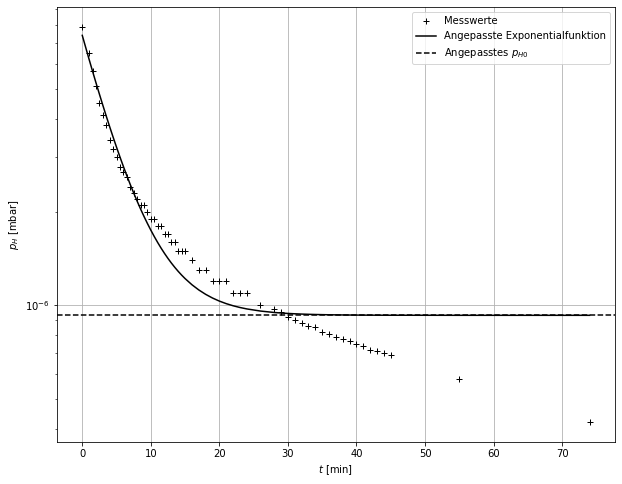

In [37]:
# Create a plot and format it
fig, ax = plt.subplots(figsize=[10, 8])
ax.set_xlabel("$t$ [min]")
ax.set_ylabel("$p_H$ [mbar]")
ax.set_yscale('log')
ax.get_yaxis().get_major_formatter().labelOnlyBase = False
ax.grid()

# Plot the measurement data
ax.plot(t_arr, p_H_arr, 'k+', label='Messwerte')

# Plot the fit
ax.plot(t_arr, p_fit(t_arr, *params_fit), 'k-', label='Angepasste Exponentialfunktion')

# Plot the fitted p_H0
ax.axhline(params_fit[2],  c='k', ls='--', label='Angepasstes $p_{H0}$')

ax.legend()

fig.savefig('figs/aufgabe2.pdf', bbox_inches='tight')